Take a dataset with a continuous numerical feature. Apply three different
transformation techniques (e.g., log, square root, Box-Cox) to this feature, and also
apply discretization (binning). Analyze and report how each
transformation/discretization affects the distribution of the data and its correlation with
a target variable.

1. Setup and Baseline Analysis

--- Baseline Analysis ---
Original Skewness: 1.6467
Original Correlation (Pearson's r): 0.6881


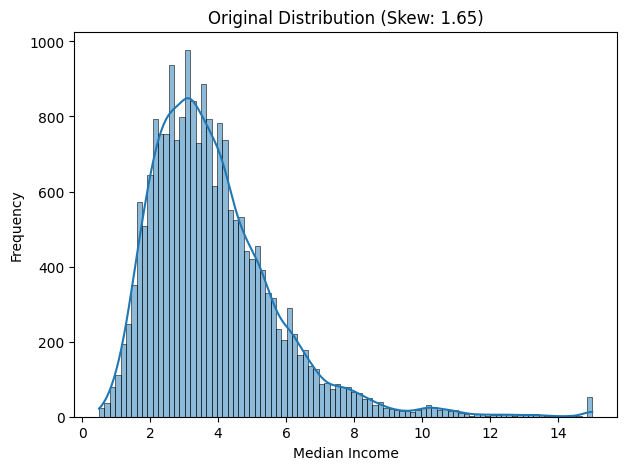

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import KBinsDiscretizer
from scipy import stats

# 1. Load Data
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Isolate our feature (X) and target (y)
X = df['MedInc']
y = df['MedHouseVal']

# 2. Baseline Analysis
original_skew = X.skew()
original_corr = X.corr(y)

print(f"--- Baseline Analysis ---")
print(f"Original Skewness: {original_skew:.4f}")
print(f"Original Correlation (Pearson's r): {original_corr:.4f}")

# Plot original distribution
plt.figure(figsize=(7, 5))
sns.histplot(X, kde=True)
plt.title(f'Original Distribution (Skew: {original_skew:.2f})')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

2. Applying Transformations and Discretization

In [2]:
# --- 1. Log Transform ---
# Use np.log1p (log(x+1)) to handle any potential zero values safely
X_log = np.log1p(X)

# --- 2. Square Root Transform ---
X_sqrt = np.sqrt(X)

# --- 3. Box-Cox Transform ---
# Box-Cox requires data to be strictly positive (which MedInc is)
# It returns the transformed data and the optimal lambda value
X_boxcox, boxcox_lambda = stats.boxcox(X)
print(f"\nOptimal Lambda for Box-Cox: {boxcox_lambda:.4f}")

# --- 4. Discretization (Binning) ---
# We'll use 'quantile' binning to create 5 bins with (roughly) equal numbers of samples
# strategy='quantile' creates 5 bins (quintiles)
# encode='ordinal' gives us integer labels (0, 1, 2, 3, 4)
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
# KBinsDiscretizer expects a 2D array, so we reshape
X_binned = discretizer.fit_transform(X.values.reshape(-1, 1)).flatten()


Optimal Lambda for Box-Cox: 0.0909


3. Analyzing the Effect on Distribution

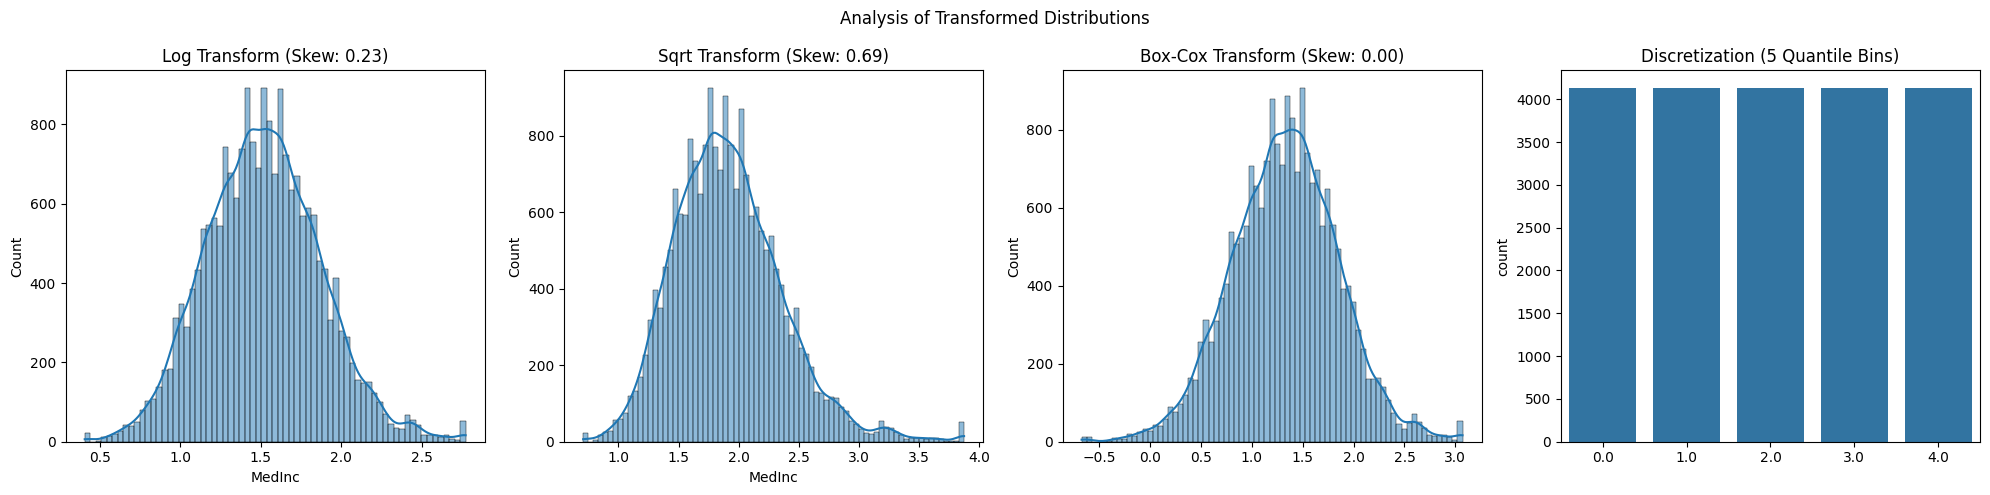

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot Log Transform
sns.histplot(X_log, kde=True, ax=axes[0])
axes[0].set_title(f'Log Transform (Skew: {X_log.skew():.2f})')

# Plot Square Root Transform
sns.histplot(X_sqrt, kde=True, ax=axes[1])
axes[1].set_title(f'Sqrt Transform (Skew: {X_sqrt.skew():.2f})')

# Plot Box-Cox Transform
sns.histplot(X_boxcox, kde=True, ax=axes[2])
axes[2].set_title(f'Box-Cox Transform (Skew: {pd.Series(X_boxcox).skew():.2f})')

# Plot Binned Data
sns.countplot(x=X_binned, ax=axes[3])
axes[3].set_title('Discretization (5 Quantile Bins)')

plt.suptitle('Analysis of Transformed Distributions')
plt.tight_layout()
plt.show()

4. Analyzing the Effect on Correlation


--- Correlation Analysis ---
Correlation with Original: 0.6881
Correlation with Log: 0.6699
Correlation with Sqrt: 0.6829
Correlation with Box-Cox: 0.6593


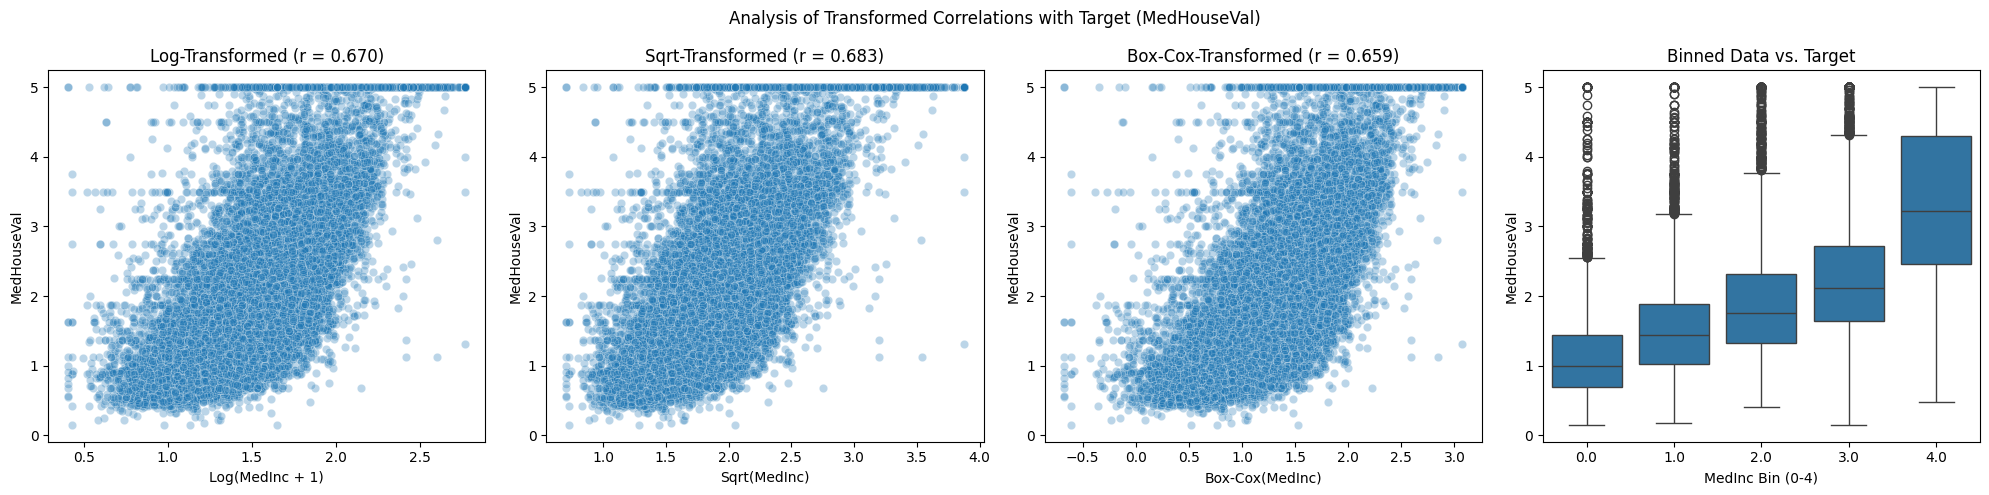

In [4]:
# Store new correlations
corr_data = {
    'Original': original_corr,
    'Log': X_log.corr(y),
    'Sqrt': X_sqrt.corr(y),
    'Box-Cox': pd.Series(X_boxcox).corr(y)
}

print("\n--- Correlation Analysis ---")
for key, value in corr_data.items():
    print(f"Correlation with {key}: {value:.4f}")

# Create plots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot Log Transform
sns.scatterplot(x=X_log, y=y, ax=axes[0], alpha=0.3)
axes[0].set_title(f'Log-Transformed (r = {corr_data["Log"]:.3f})')
axes[0].set_xlabel('Log(MedInc + 1)')

# Plot Square Root Transform
sns.scatterplot(x=X_sqrt, y=y, ax=axes[1], alpha=0.3)
axes[1].set_title(f'Sqrt-Transformed (r = {corr_data["Sqrt"]:.3f})')
axes[1].set_xlabel('Sqrt(MedInc)')

# Plot Box-Cox Transform
sns.scatterplot(x=X_boxcox, y=y, ax=axes[2], alpha=0.3)
axes[2].set_title(f'Box-Cox-Transformed (r = {corr_data["Box-Cox"]:.3f})')
axes[2].set_xlabel('Box-Cox(MedInc)')

# Plot Binned Data (Boxplot is more appropriate)
sns.boxplot(x=X_binned, y=y, ax=axes[3])
axes[3].set_title('Binned Data vs. Target')
axes[3].set_xlabel('MedInc Bin (0-4)')

plt.suptitle('Analysis of Transformed Correlations with Target (MedHouseVal)')
plt.tight_layout()
plt.show()